### Exercise 1. (Notebook 4)

* Create a function that calculates the frequency of hashtags in tweets.
* Test it on toy examples, to make sure it works.
* Apply it to Elon Musk's tweets.
* List the top 10 hashtags in the dataset.

In [1]:
import pandas as pd
from collections import Counter

In [2]:
def get_hashtag_frequency(tweets):
    '''
    Returns number of hashtags and list of hashtags 
    
    Args:
        tweets (list): list of tweets
        
    Returns:
        Counter: hashtags and their frequencies 
    '''
    
    hashtags = []
    for tweet in tweets:
        words = tweet.split()
        
        for word in words:
            if word.startswith('#'):
                hashtags.append(word.lower())  # hashtags are not case-sensitive
                
    counter = Counter(hashtags)
    
    return counter


In [3]:
test_tweet1 = "#climate #thisisit #forreal #aoc #climate are we ready?"

In [4]:
get_hashtag_frequency([test_tweet1])  # input as list of one

Counter({'#climate': 2, '#thisisit': 1, '#forreal': 1, '#aoc': 1})

Now on the entire Elon Musk dataset:

In [5]:
file_path = 'data/elonmusk_tweets.csv'
df_elon = pd.read_csv(file_path, encoding="utf-8")

hashtag_frequencies = get_hashtag_frequency(df_elon['text'])

print("Most frequent hashtags:")
for ht, freq in hashtag_frequencies.most_common(10):
    print(f"\t{freq}\t{ht}")

Most frequent hashtags:
	25	#dragon
	8	#tesla
	6	#dragonlaunch
	5	#falcon9
	3	#1
	3	#modelx
	3	#iss
	3	#apspacechat
	2	#mars
	2	#westworld


-----

### Exercise 2. (notebook 4)

Read the file `data/adams-hhgttg.txt` and:

- Count the number of occurrences per distinct word in the text.

- Create a data frame with two columns: word and counts.

- Plot the histogram of the word frequencies and think about what is happening.



In [6]:
import string
from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
stop_words = stopwords.words('english')

In [8]:
def get_token_frequencies(file_path, normalization=False):
    
    """
    This function normalizes the text and returns word count frequencies
    
    Args:
        file_path (str): path to text file
        normalization (bool, optional): also do normalization, defaults to False
    
    Returns:
        Counter: Word count frequencies 
    """
    
    with open(file_path, 'r', encoding='utf-8') as infile:
        text = infile.read()
    
    tokens = word_tokenize(text)
    
    if normalization:
        tokens = normalize_tokens(
            tokens, 
            lowercase=True, 
            punctuation=True, 
            minimum_word_length=4, 
            stopwords=stop_words  # global variable, defined outside of function
        )
        
    counter = Counter(tokens)
    
    return counter

In [9]:
def normalize_tokens(tokens, lowercase=True, punctuation=True, minimum_word_length=4, stopwords=[]):
    """
    Normalize a list of tokens, by optional lowercasing, punctuation removal, 
    setting a mimimum token length, and stopword removal. 
    
    Args:
        tokens (list): list with word tokens
        lowercase (bool, optional): transform the tokens to lowercase, default to True
        minimum_word_length (int, optional): remove tokens with less than this number 
                                             of characters, defaults to 4. Set to 0 to disable.
        punctuation (bool, optional): remove punctuation tokens, defaults to True
        stopwords (list, optional): remove given stopwords from tokens, defaults to []
    
    Returns:
        list: list of words after normalization
    """
    
    if lowercase:
        tokens = [i.lower() for i in tokens]
        
    if punctuation:
        tokens = [i for i in tokens if i not in string.punctuation]
        
    if minimum_word_length:
        tokens = [i for i in tokens if len(i) > minimum_word_length]
        
    if stopwords:
        tokens = [i for i in tokens if i not in stopwords]
    
    return tokens

In [10]:
token_frequencies = get_token_frequencies('data/adams-hhgttg.txt', normalization=True)

To transform a dictionary (or Counter object, which is very similar) to a DataFrame, you can do:

In [11]:
df = pd.DataFrame.from_dict(token_frequencies, orient='index', columns=['count'])
df = df.sort_values(by='count', ascending=False)
df.index = df.index.set_names('tokens')
df

,count
tokens,
arthur,346
zaphod,213
would,130
thought,119
planet,102
...,...
tinkered,1
directing,1
spell,1


Or:

In [12]:
df = pd.DataFrame({"tokens": token_frequencies.keys(), "count": token_frequencies.values()})
df = df.set_index('tokens')
df = df.sort_values(by='count', ascending=False)
df

,count
tokens,
arthur,346
zaphod,213
would,130
thought,119
planet,102
...,...
tinkered,1
directing,1
spell,1


Or:

In [13]:
df = pd.DataFrame()
df['tokens'] = token_frequencies.keys()
df['count'] = token_frequencies.values()

df = df.set_index('tokens')
df = df.sort_values(by='count', ascending=False)
df

,count
tokens,
arthur,346
zaphod,213
would,130
thought,119
planet,102
...,...
tinkered,1
directing,1
spell,1


<AxesSubplot:xlabel='tokens'>

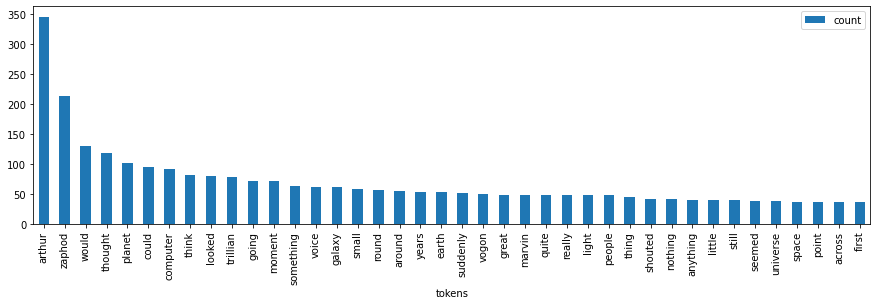

In [14]:
df.head(40).plot(kind='bar', figsize=(15,4))

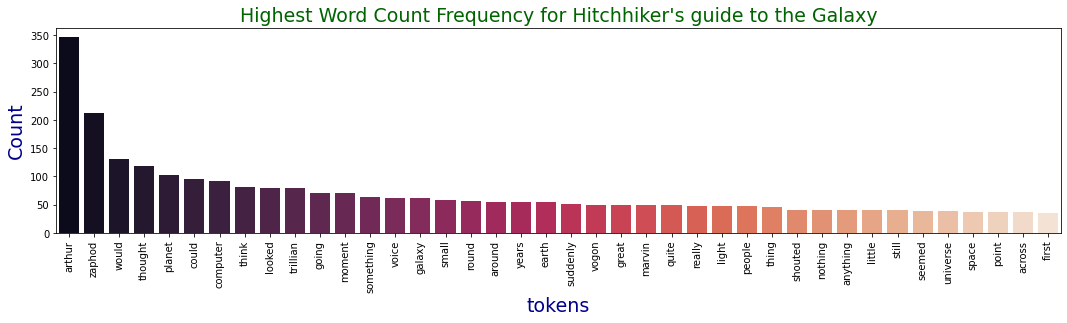

In [15]:
plt.figure(figsize=(15,4))
plt.xlabel("Words", fontsize=19, color="darkblue")
plt.ylabel("Count", fontsize=19, color="darkblue")
plt.title("Highest Word Count Frequency for Hitchhiker's guide to the Galaxy", fontsize=19, color="darkgreen")
plt.tight_layout()
plt.xticks(rotation = 90)

sns.barplot(data=df.head(40).T, palette="rocket")

plt.savefig("stuff/HitchhikerMostFreq.pdf")

-------

### Exercise 1. (Notebook 5)

With these tweets:

* Plot the top n words together in a single figure, and show their trends over time.
* Do the same for the top n users mentioned.

In [16]:
import string
from collections import Counter

import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [17]:
file_path = 'data/elonmusk_tweets.csv'
df_elon = pd.read_csv(file_path, encoding="utf-8")
df_elon

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...
...,...,...,...
2814,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw
2815,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa..."
2816,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...
2817,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...


In [18]:
tokenizer = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)
stop_words = stopwords.words('english')

def filter_tweet(tokens):
    """
    Normalize a tweet's text by removing punctuation tokens and URLs.
    
    Args:
        tokens (list): List of tokens from a tokenizer
        
    Returns:
        list: List of non-punctuation and URL tokens
    """
    normalized = []
    
    for token in tokens:
        if token in string.punctuation:
            continue
        if token in stop_words:
            continue
        elif len(token) <= 3:
            continue
        elif token.startswith(('http', 'www')):
            continue
        else:
            normalized.append(token)
  
    return normalized


def normalize_tweet(tweet, tokenizer=tokenizer):
    """
    Tokenize a tweet using a specified tokenizer and filter/normalize the tokens.
    
    Args:
        tweet (str): A tweet in text
        tokenizer (function): specific tokenizer that returns a list of tokens
        
    Returns:
        str: A normalized tweet
    """
    
    # This gives a list of tokens
    tweet = tweet.lower()
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = filter_tweet(tokens)
    
    # This returns it back to a string
    normalized_tweet = " ".join(filtered_tokens)
    
    return normalized_tweet

In [19]:
df_elon["clean_text"] = df_elon["text"].apply(normalize_tweet)
df_elon.to_csv("stuff/df_elon.csv", index=False)
df_elon

,id,created_at,text,clean_text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@forin2020 @waltmossberg @mims @defcon_5 exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 walt
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,stormy weather shortville
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,@daveleebbc @verge coal dying fracking basical...
...,...,...,...,...
2814,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw,total sequitur
2815,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better twain hea...
2816,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...,made volume model need work miniature stonehenge
2817,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,went iceland ride bumper cars country vlad's r...


In [20]:
df_elon['created_at'] = pd.to_datetime(df_elon['created_at'])
df_elon["year"] = df_elon["created_at"].dt.year
df_elon

,id,created_at,text,clean_text,year
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,robots spared humanity,2017
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@forin2020 @waltmossberg @mims @defcon_5 exact...,2017
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 walt,2017
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,stormy weather shortville,2017
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,@daveleebbc @verge coal dying fracking basical...,2017
...,...,...,...,...,...
2814,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw,total sequitur,2011
2815,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better twain hea...,2011
2816,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...,made volume model need work miniature stonehenge,2011
2817,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,went iceland ride bumper cars country vlad's r...,2011


Now, add the top n words to the dataframe as column and as value the token count in a tweet (row):

In [21]:
def plot_top_tokens(df, column, n=5, entity='words', destination="stuff/tweetsperyear.pdf"):
    """
    Plot the top n words or users from text in a dataframe column.
    
    Args:
        df (pd.DataFrame): 
        column (str): name of column with texts
        n (int, optional): top n most frequent terms. Defaults to 5.
        entity (str, optional): type of term to plot, options are 'words' (default) and 'users'. 
    """
    
    all_tokens = []  # empty list

    for text in df[column]:
        all_tokens += text.split()
        
    counter = Counter(all_tokens)
    word_frequencies = counter.most_common()

    words = []
    users = []

    for word, frequency in word_frequencies:

        if word.startswith('@'):
            users.append(word)
        else:
            words.append(word)
            
    if entity == 'words':
        top_terms = words[:n]
    elif entity == 'users':
        top_terms = users[:n]
    else:
        print("Invalid entity type. Possible: 'words' and 'users'")
        return None
        
    for word in top_terms:
        df[word]= df['clean_text'].str.count(word)

    title = f"Elon's top {n} {entity} over time" 
        
    # Plotting!
    df_top_terms_per_year = df.groupby('year')[top_terms].sum()
    
    df_top_terms_per_year.plot(ylabel='Count', xlabel='Year', title=title, figsize=(15,4))
        
    plt.savefig(destination)
    

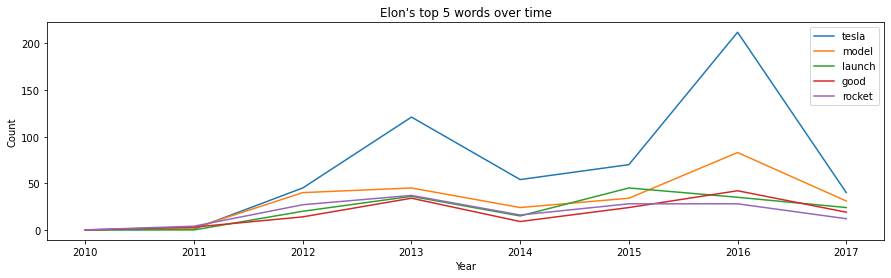

In [22]:
plot_top_tokens(df_elon, 'clean_text', n=5, entity='words')

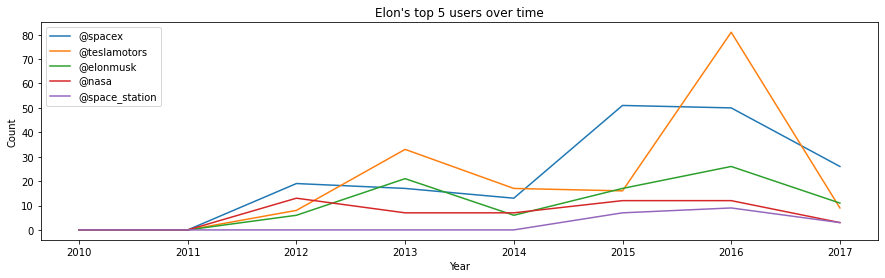

In [23]:
plot_top_tokens(df_elon, 'clean_text', entity='users')